In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate  #for tablular format

import warnings
warnings.filterwarnings("ignore")

# FUNCTIONS

### ***Data checking***

In [2]:
def datacheck(data):

    print(f"Rows: {data.shape[0]}\tColumns: {data.shape[1]}")
    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))

### *HISTOGRAM*

In [50]:
def histogramvisual(a,alabel):

  sns.histplot(a,  kde=True, color='blue')

  plt.title(f"{alabel} Distibution")
  plt.xlabel(alabel)
  plt.ylabel("Total cars")
  plt.tick_params(axis='x', labelsize=8, rotation=85)

  plt.tight_layout()
  plt.show()
  return

### *Count Bar*

In [51]:
def countvisual(a,b,alabel,blabel):

    custom_palette = sns.color_palette("pastel")
    ax = sns.countplot(x=a, hue=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

    plt.title(f"{alabel} vs {blabel}")
    plt.xlabel(alabel)
    plt.ylabel(blabel)
    plt.tick_params(axis='x', labelsize=8, rotation=85)

    plt.tight_layout()
    plt.show()
    return

### *Bar Graph*

In [52]:
def barvisual(a,b,alabel,blabel):

  custom_palette = sns.color_palette("plasma")

  ax = sns.barplot(x=a, y=b, palette=custom_palette, alpha=0.5,  edgecolor='black', linewidth=0.5)

  # Showing values
  for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points', fontsize=7)

  plt.title(f"{alabel} vs {blabel}")
  plt.xlabel(alabel)
  plt.ylabel(blabel)
  plt.tick_params(axis='x', labelsize=8, rotation=85)
  plt.tight_layout()
  plt.show()

  return

# DATASET

In [6]:
df = pd.read_csv("C:/Users/palla/Downloads/Python/Data_science/CarPrice_Assignment.csv")

In [7]:
datacheck(df)

Rows: 205	Columns: 26
╒══════════════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column           │   Total Unique Values │   Missing Values │ Data Type   │
╞══════════════════╪═══════════════════════╪══════════════════╪═════════════╡
│ car_ID           │                   205 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ symboling        │                     6 │                0 │ int64       │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ CarName          │                   142 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ fueltype         │                     2 │                0 │ object      │
├──────────────────┼───────────────────────┼──────────────────┼─────────────┤
│ aspiration       │                     2 │                0 │ object      │
├──────────────────┼──────────────────────

In [8]:
df['CarName'].str.lower().unique()
#Checking the unique ones
df['Company']=df['CarName'].apply(lambda x: x.split(' ')[0])
#Creating a new column for company names

In [27]:
#Average Car Price for each company
z = df.groupby('Company')['price'].mean().reset_index().sort_values(by='Company', ascending=False)
#Average Car Prices for both the fuel type
y= df.groupby('fueltype')['price'].mean().reset_index().sort_values(by='fueltype', ascending=False)

# *GRAPHS*

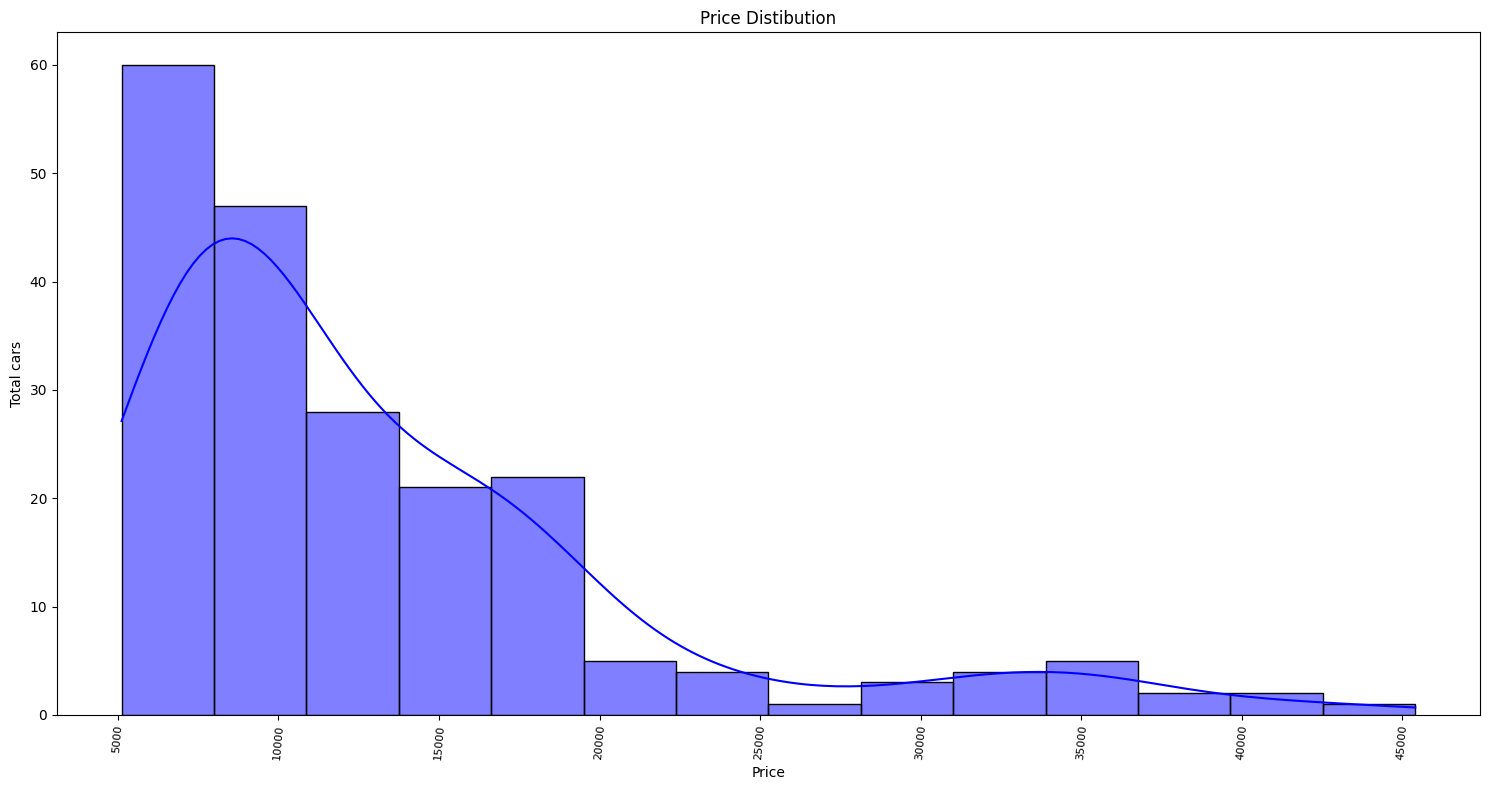

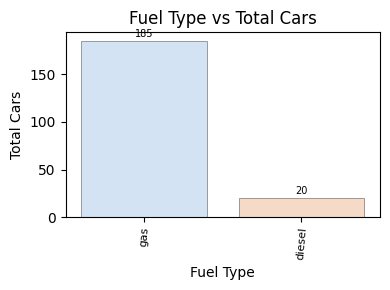

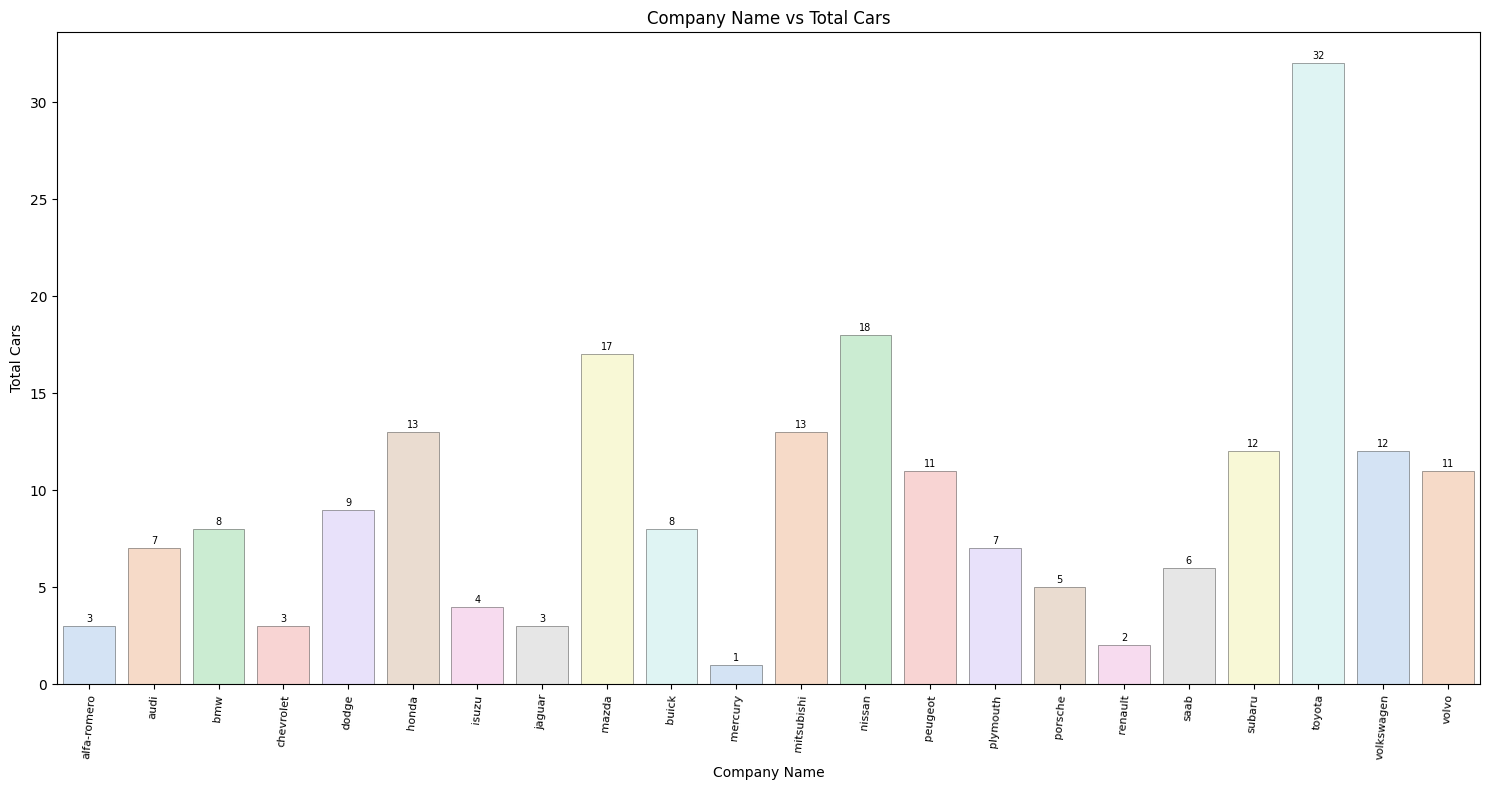

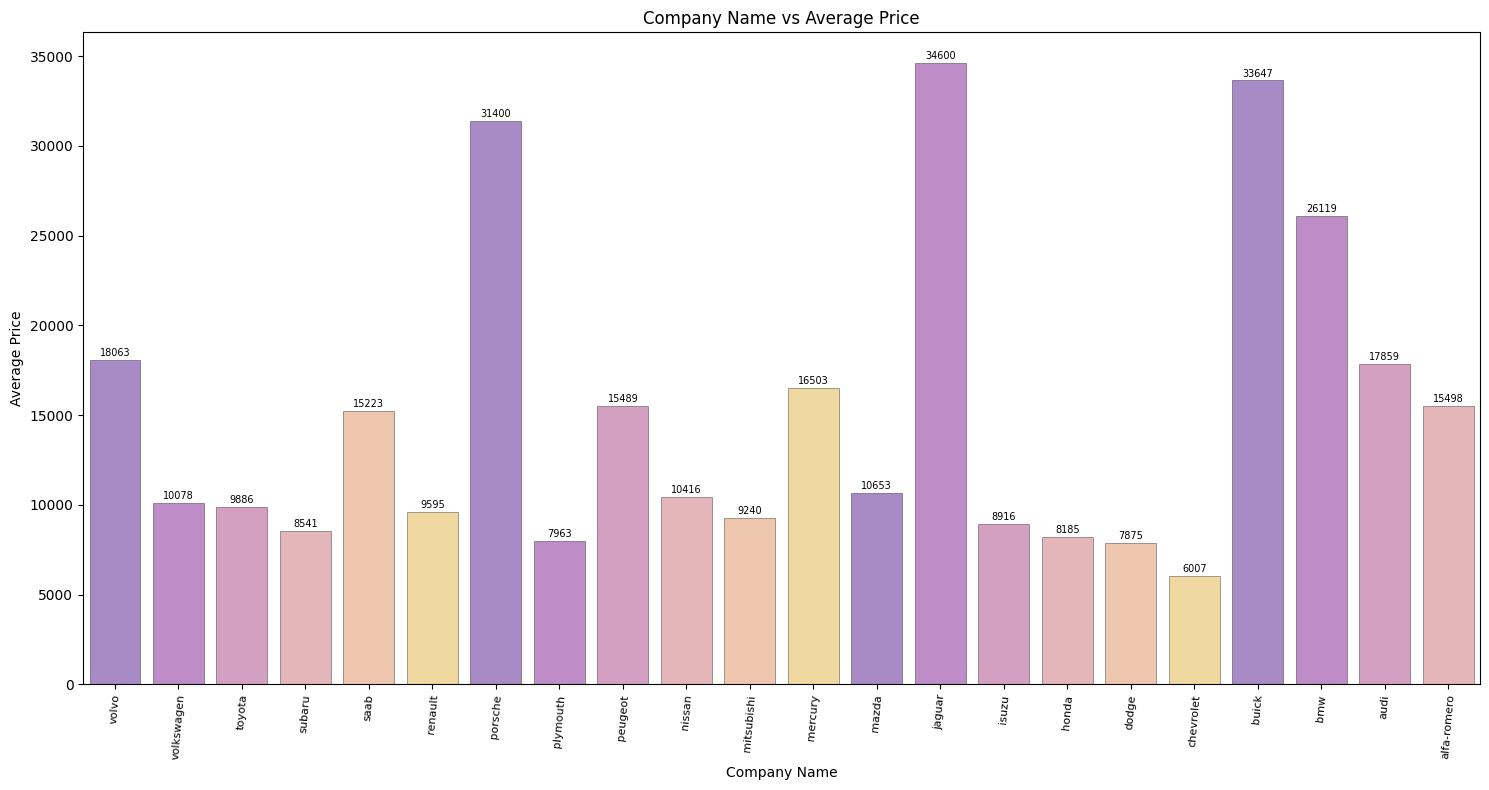

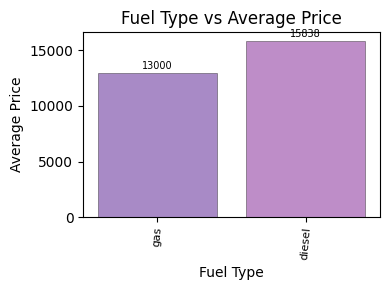

In [62]:
plt.figure(figsize=(15,8))

histogramvisual(df['price'],"Price")

plt.figure(figsize=(4,3))
countvisual(df['fueltype'],df['fueltype'],"Fuel Type","Total Cars")

plt.figure(figsize=(15,8))
countvisual(df['Company'],df['Company'],"Company Name","Total Cars")

plt.figure(figsize=(15,8))
barvisual(z['Company'],z['price'],"Company Name","Average Price")

plt.figure(figsize=(4,3))
barvisual(y['fueltype'],y['price'],"Fuel Type","Average Price")